# EDA

questions 1-3
- for correlations
- look at tiem period -one
- they correlate three months after instead of current month
- statistical tests: time series correlation: granger casuality: 
            -https://www.real-statistics.com/time-series-analysis/time-series-miscellaneous/granger-causality/
            - show if climate can predict cost
            - excel and python

- delaying factors


In [1]:
# Imported packages
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
#'Year' was dropped from dataframe because it was redundant to date
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
data = data_orig.drop(['Year'], axis=1)

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)


data.head(5)

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,66.86,67.19,66.36,66.40,"5,348,800",33.50,33.69,32.93,32.98,"1,854,500"
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,66.41,66.84,66.12,66.74,"6,042,400",33.00,33.18,32.66,32.73,"1,721,200"
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,66.58,66.67,66.12,66.22,"4,909,100",32.69,32.73,31.80,31.81,"4,621,400"
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,66.27,66.27,65.29,65.39,"6,533,000",31.75,31.83,31.22,31.45,"4,981,500"
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,65.26,65.83,65.01,65.73,"5,859,600",31.53,31.91,31.50,31.83,"1,759,800"


In [3]:
#resample data monthly
data_month = data.resample('1M').mean()
data_month.head(5)

,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,WEAT_Open,WEAT_High,WEAT_Low,...,GIS_Low,GIS_Close,PEP_Open,PEP_High,PEP_Low,PEP_Close,CPB_Open,CPB_High,CPB_Low,CPB_Close
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,0.50,36.12,2.09,40.720000,40.960000,40.324000,40.692000,21.540000,21.639000,21.350000,...,40.190500,40.428000,65.713000,66.024500,65.318000,65.713500,32.047000,32.245000,31.769000,32.000000
2012-02-29,0.49,37.51,1.85,40.672500,40.953500,40.368000,40.683000,21.396000,21.500000,21.237000,...,38.847000,39.051500,64.337500,64.584500,64.001500,64.281500,32.365000,32.653500,32.220000,32.421000
2012-03-31,0.57,50.41,2.87,40.433182,40.689545,40.016364,40.267727,21.106818,21.200000,20.980909,...,38.477273,38.706364,64.212273,64.576364,64.023182,64.363182,32.960000,33.147727,32.810000,32.980000
2012-04-30,0.71,54.68,2.23,38.630000,38.854500,38.233500,38.486500,20.317000,20.367500,20.136500,...,38.769000,38.945000,65.980500,66.303500,65.763000,66.039500,33.523500,33.699500,33.350500,33.545500
2012-05-31,0.77,63.45,2.50,36.822273,37.153182,36.450455,36.770909,19.753182,20.011364,19.687727,...,38.672727,38.880000,67.401364,67.927727,67.112727,67.561364,33.455455,33.649091,33.213636,33.393182


In [4]:
#create 3 seperate datasets for each item to be observed
#easier to observe patterns when comparing similar items
climate = data[['Temp_Anamoly','Avg_Temp_F','Avg_Precip_In']]
stock = data [['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
commodity = data[['CORN_Close','CORN_Volume','WEAT_Close','WEAT_Volume','CANE_Close','CANE_Volume']]
company = data[['HSY_Close','HSY_Volume','SJM_Close','SJM_Volume','GIS_Close','GIS_Volume','PEP_Close','PEP_Volume','CPB_Close','CPB_Volume']]

In [3]:
#44 rows(features)
#2012 columns
data.shape

(2012, 44)

In [4]:
#list of all columns in dataset
#each stock name has Open, High, Low, Close, and Volume information
data.columns

Index(['Month', 'Temp_Anamoly', 'Avg_Temp_F', 'Avg_Precip_In', 'CORN_Open',
       'CORN_High', 'CORN_Low', 'CORN_Close', 'CORN_Volume', 'WEAT_Open',
       'WEAT_High', 'WEAT_Low', 'WEAT_Close', 'WEAT_Volume', 'CANE_Open',
       'CANE_High', 'CANE_Low', 'CANE_Close', 'CANE_Volume', 'HSY_Open',
       'HSY_High', 'HSY_Low', 'HSY_Close', 'HSY_Volume', 'SJM_Open',
       'SJM_High', 'SJM_Low', 'SJM_Close', 'SJM_Volume', 'GIS_Open',
       'GIS_High', 'GIS_Low', 'GIS_Close', 'GIS_Volume', 'PEP_Open',
       'PEP_High', 'PEP_Low', 'PEP_Close', 'PEP_Volume', 'CPB_Open',
       'CPB_High', 'CPB_Low', 'CPB_Close', 'CPB_Volume'],
      dtype='object')

In [7]:
#data type of each column 
#need to change objects to int
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2012-01-03 to 2019-12-31
Data columns (total 44 columns):
Month            2012 non-null object
Temp_Anamoly     2012 non-null float64
Avg_Temp_F       2012 non-null float64
Avg_Precip_In    2012 non-null float64
CORN_Open        2012 non-null float64
CORN_High        2012 non-null float64
CORN_Low         2012 non-null float64
CORN_Close       2012 non-null float64
CORN_Volume      2012 non-null object
WEAT_Open        2012 non-null float64
WEAT_High        2012 non-null float64
WEAT_Low         2012 non-null float64
WEAT_Close       2012 non-null float64
WEAT_Volume      2012 non-null object
CANE_Open        2012 non-null float64
CANE_High        2012 non-null float64
CANE_Low         2012 non-null float64
CANE_Close       2012 non-null float64
CANE_Volume      2012 non-null object
HSY_Open         2012 non-null float64
HSY_High         2012 non-null float64
HSY_Low          2012 non-null float64
HSY_Close        2012

In [5]:
#no null values
data.isnull().sum()

Month            0
Temp_Anamoly     0
Avg_Temp_F       0
Avg_Precip_In    0
CORN_Open        0
CORN_High        0
CORN_Low         0
CORN_Close       0
CORN_Volume      0
WEAT_Open        0
WEAT_High        0
WEAT_Low         0
WEAT_Close       0
WEAT_Volume      0
CANE_Open        0
CANE_High        0
CANE_Low         0
CANE_Close       0
CANE_Volume      0
HSY_Open         0
HSY_High         0
HSY_Low          0
HSY_Close        0
HSY_Volume       0
SJM_Open         0
SJM_High         0
SJM_Low          0
SJM_Close        0
SJM_Volume       0
GIS_Open         0
GIS_High         0
GIS_Low          0
GIS_Close        0
GIS_Volume       0
PEP_Open         0
PEP_High         0
PEP_Low          0
PEP_Close        0
PEP_Volume       0
CPB_Open         0
CPB_High         0
CPB_Low          0
CPB_Close        0
CPB_Volume       0
dtype: int64

In [17]:
#max temp anamoly was over 1 degree F--high, lowest was 0.49 degrees F
    #mean temp anamoly is 0.84--very high--evidence of climate change
#average Temp in degrees F-- max seen was alittle of 76 degrees F, lowest was slightly over 30
    #mean average temp is about 54 degrees F
    #high standard dev--shows large fluctuation in temperatures
#avg precipitation in inches-- max is slightly over 4 inches, min is slightly over 1 inch
    #mean is about 2.68 inches per month
climate.describe()

,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In
count,2012.000000,2012.000000,2012.000000
mean,0.844896,54.106953,2.687013
std,0.172645,14.982061,0.612168
min,0.490000,30.560000,1.320000
25%,0.750000,40.010000,2.240000
50%,0.830000,53.710000,2.640000
75%,0.940000,68.700000,3.130000
max,1.380000,76.770000,4.470000


In [19]:
#CORN has greatest mean closing price out of commodity stock
    #WEAT had lowest closig price at almost 5 dollars
#SJM has greatest mean closing price out of company stock
    #CPB has lowest closing price at alittle over 31 dollars
#std is overall relatively high for stock closing prices
stock.describe()

,CORN_Close,WEAT_Close,CANE_Close,HSY_Close,SJM_Close,GIS_Close,PEP_Close,CPB_Close
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,25.711516,11.384379,12.146441,98.734026,109.607450,51.632803,98.708231,45.510293
std,10.123039,5.781549,4.318318,19.279815,16.698708,7.642144,18.703147,8.404223
min,14.240000,4.880000,6.300000,59.490000,71.600000,36.700000,62.280000,31.330000
25%,17.440000,6.530000,8.697500,90.507500,101.095000,46.112500,83.217500,39.972500
50%,22.010000,9.250000,11.550000,96.935000,108.150000,52.255000,99.450000,44.830000
75%,33.182500,16.132500,14.782500,107.085000,121.242500,56.495000,112.020000,49.492500
max,52.670000,25.350000,24.660000,161.400000,156.230000,72.640000,140.280000,67.550000


## Dataset Notes

**Yahoo Finance**
- Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day)
- High is the highest price of the stock on that trading day
- Low the lowest price of the stock on that trading day
- Close the price of the stock at closing time
- Volume indicates how many stocks were traded
- Stock prices are considered to be set mostly by traders, stock splits (when the company makes each extant stock worth two and halves the price) and dividends (payout of company profits per share) also affect the price of a stock and should be accounted for
- **past performance is no indicator of future performance in stocks!!!!**

**Dataset**<br>
Factors to be looked at:
- climate factors
     - Average Temperature- per month
     - Temperature Anamoly- difference from the mean
     - Average Precipitation- per month
- comodity stock pricing
     - CORN
     - WEAT
     - CANE
- and company stock pricing
     - HSY: The Hershey Company
     - SJM: The J.M. Smucker Company
     - GIS: General Mills 
     - PEP: PepsiCo
     - CPB: Campbell Soup Company

## Correlations- All Data

### Correlation 1

Text(0.5,1,'Correlation Heatmap')

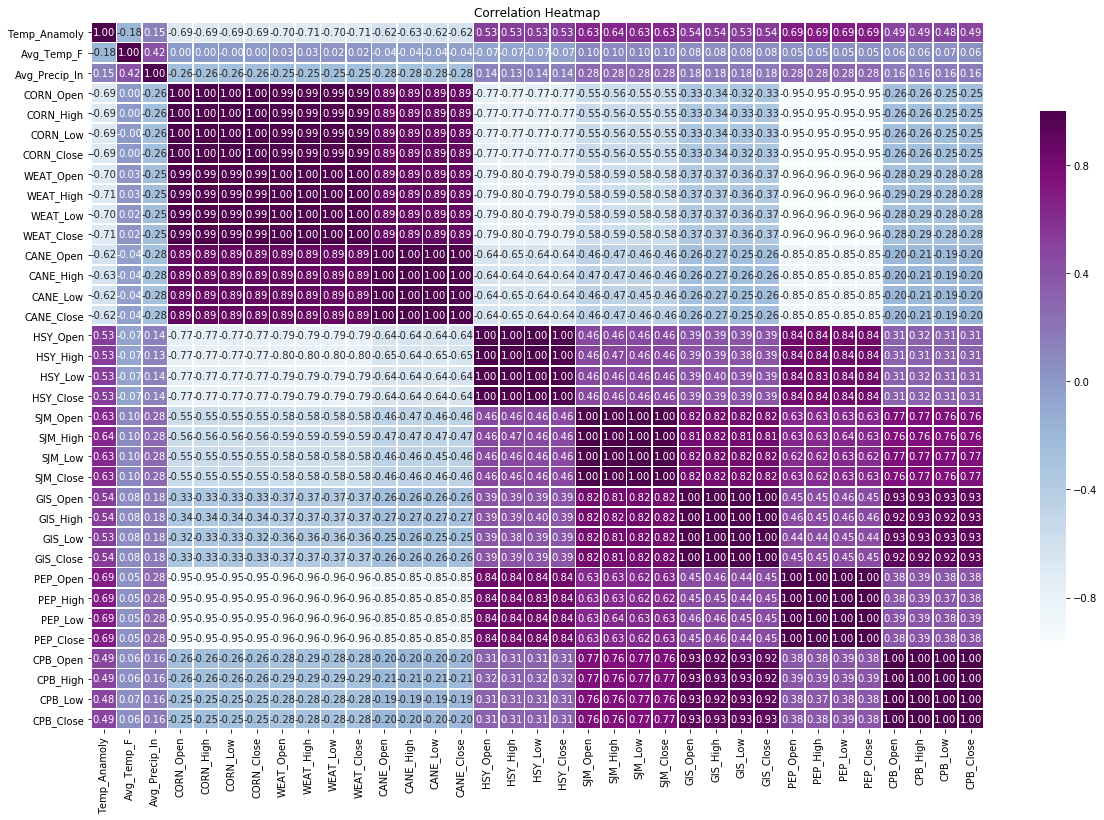

In [19]:
#Created a heatmap to see the correlation between the different variables---all data--using Spearman Method
####purpose: what features should we be focusing on?? which are the most related


plt.figure(figsize = (20,13))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(data.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
plt.title('Correlation Heatmap-Spearman Method') #title
#plt.savefig('corr_raw.png')

**Correlation Relationships**
#https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8
- 0.90 to 1.00 (-0.90 to -1.00): Very high positive (negative) correlation
- 0.70 to 0.90 (-0.70 to -0.90): High positive (negative) correlation
- 0.50 to 0.70 (-0.50 to -0.70): Moderate positive (negative) correlation
- 0.30 to 0.50 (-0.30 to -0.50): Low positive (negative) correlation
- 0.00 to 0.30 (0.00 to -0.30): Negligible (No) correlation

**Correlation Observations**:

- Temp_Anamoly has a moderate negative correlation with the commodity stocks
- Average precipitation has negligible correlation with the commodity stocks
- Average temperature has negligible correlation with commodity stocks
- Commodity stocks are highly positively correlated with one another 
- Commodity stock performance (CORN, WEAT, CANE) is negatively correlated to company stock performance
    - commodity stock is highly negatively correlated with HSY and PEP
    - commodity stock is moderately negatively correlated with SJM


- Moderate positive correlation between Temp_Anamoly and company stocks (SJM and PEP being the most effected)
- Several company stocks are highly correlated with one another
    - PEP and HSY: 0.84 highly correlated
    - GIS and SJM: 0.82 highly correlated
    - CPB and SJM: 0.77 highly corelated
    - CPB and GIS: 0.93 very highly correlated

### Correlation 2

Text(0.5,1,'Correlation Heatmap-Pearson Method')

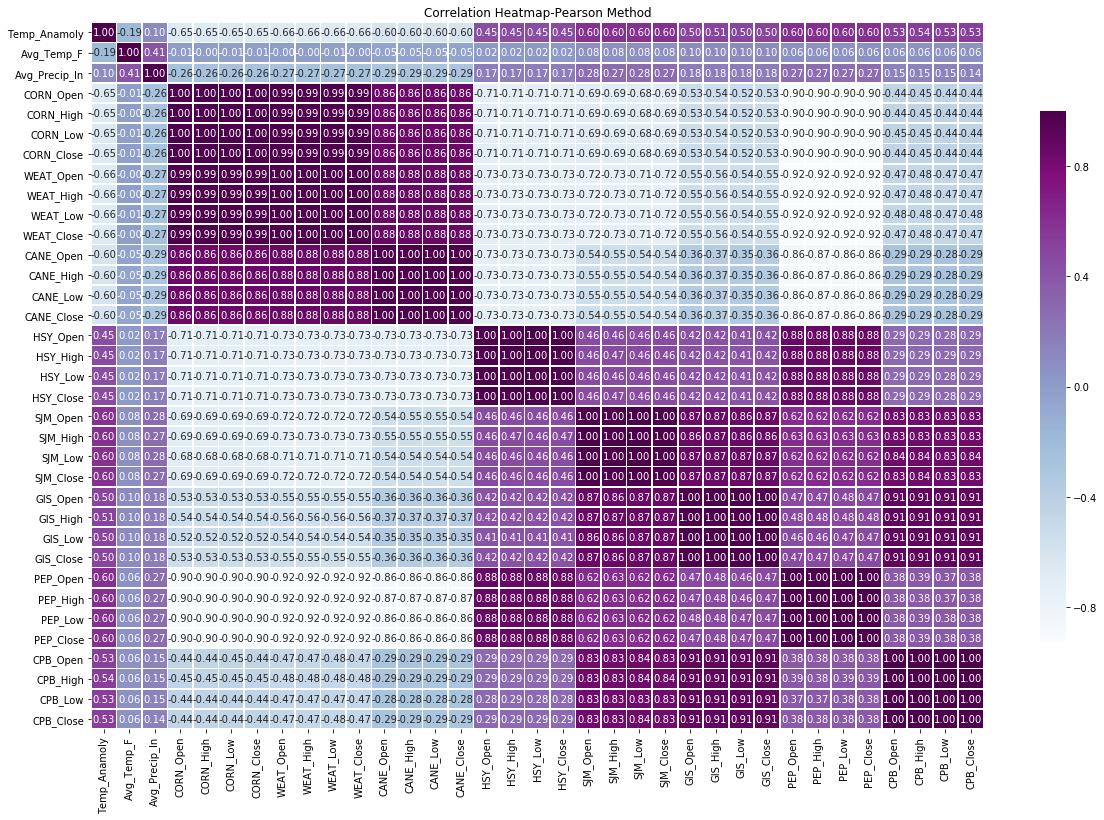

In [43]:
#Created a heatmap to see the correlation between the different variables---all data--using Pearson correlation
#another correlation method to support correlation of features
#correlation values are relatively similar---no huge differences to discredit correlations made earlier

plt.figure(figsize = (20,13))
#data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
display = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
plt.title('Correlation Heatmap-Pearson Method') #title

### Covariance
- https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/
- Measure of the joint probability for two random variables--describes how two variables change together
- The sign of the covariance can be interpreted as whether the two variables increase together (positive) or decrease together (negative). 
- **A covariance value of zero indicates that both variables are completely independent**

- Covariance: measures whether the variables tend to move in tandem
- [Correlation](https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/): measures the strength of the relationship between variables

In [16]:
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

covariance = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance)
covariance = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance)
covariance = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance)
covariance = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance)
covariance = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance)
covariance = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance)
covariance = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance)
covariance = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance)

Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and SJM_Close 1.7314035378232842
Covariance of Temp_Anamoly and GIS_Close 0.6620507651258039
Covariance of Temp_Anamoly and PEP_Close 1.9498699793284042
Covariance of Temp_Anamoly and CPB_Close 0.7743363558331763


**Features to consider**:
- 'Temp_Anamoly'
- 'CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close'

## Temp Anamoly
- we can see a big peak in 2016
- [Earth’s 2016 surface temperatures were the warmest since modern recordkeeping began in 1880](https://climate.nasa.gov/news/2537/nasa-noaa-data-show-2016-warmest-year-on-record-globally/)
- Globally-averaged temperatures in 2016 were 1.78 degrees Fahrenheit warmer than the mid-20th century mean

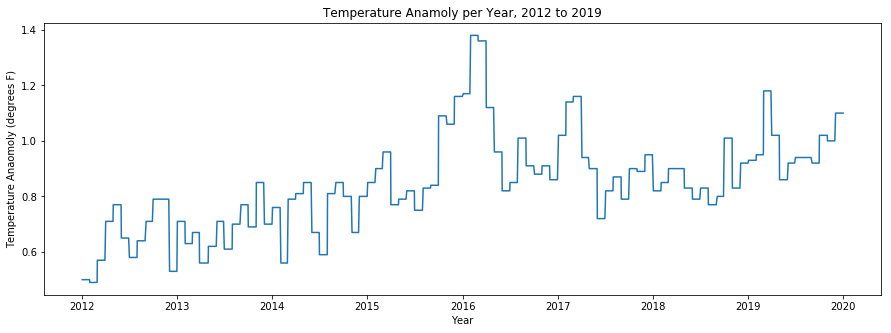

In [76]:
#line graph of temp anamolies per year
#Temp_Anamoly: difference from the mean/expected value
#biggest temperature anamoly is in 2016--big peak
#2017 and 2019 have similar high peaks, just not as big as in 2016---what is special about all 3 of these years?

plt.figure(figsize=(15,5))
plt.plot(data['Temp_Anamoly'])
plt.title('Temperature Anamoly per Year, 2012 to 2019')
plt.ylabel('Temperature Anaomoly (degrees F)')
plt.xlabel('Year')
plt.show()

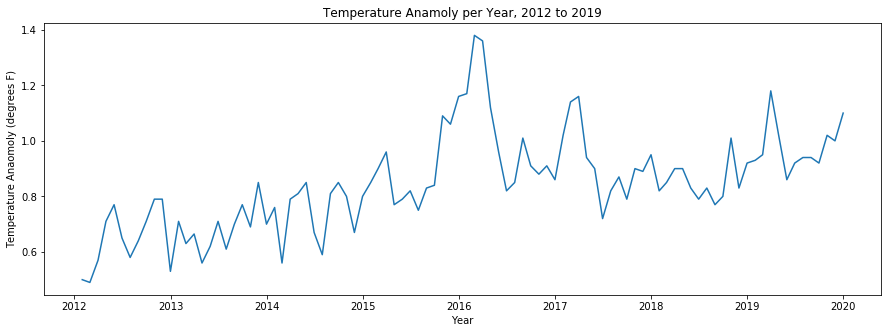

In [5]:
plt.figure(figsize=(15,5))
plt.plot(data_month['Temp_Anamoly'])
plt.title('Temperature Anamoly per Year, 2012 to 2019')
plt.ylabel('Temperature Anaomoly (degrees F)')
plt.xlabel('Year')
plt.show()

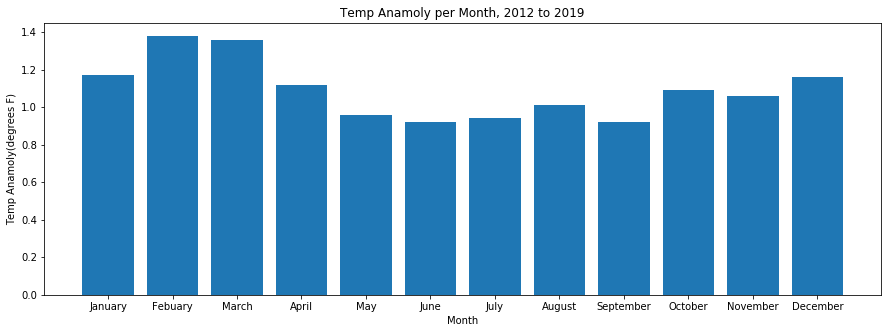

In [51]:
#bar graph of temperature anamolies per month
#Febuary and March have greatest anamolies in temperature
#June and September have lowest anamolies

plt.figure(figsize=(15,5))
plt.bar(data['Month'],data['Temp_Anamoly'])
plt.title('Temp Anamoly per Month, 2012 to 2019')
plt.ylabel('Temp Anamoly(degrees F)')
plt.xlabel('Month')
plt.show()

## Stock Figures

### Comodity Stock

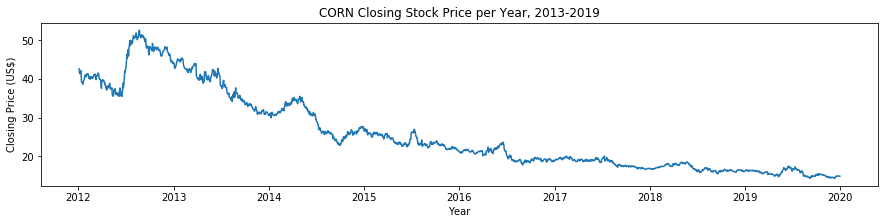

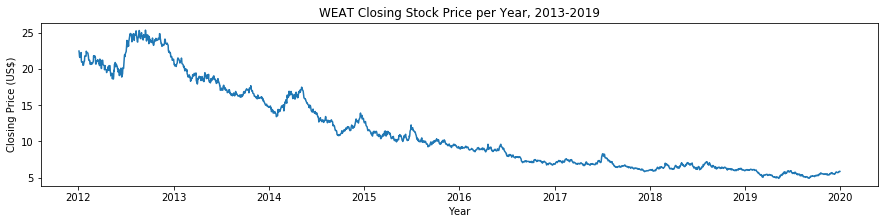

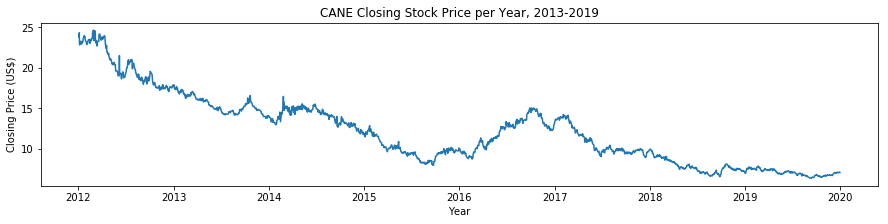

In [72]:
#line plots of close values of comodity stocks
#all stock data from 2012-2019
#from 2012-2019 comodity stock prices have decreased (CANE had small increase)
#CANE has slight peak slightly after 2016 temp anamoly


#CORN Closing prices per Year
plt.figure(figsize=(15,3))
plt.plot(data['CORN_Close'])
plt.title('CORN Closing Stock Price per Year, 2013-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#WEAT Closing prices per year
plt.figure(figsize=(15,3))
plt.plot(data['WEAT_Close'])
plt.title('WEAT Closing Stock Price per Year, 2013-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#CANE Clsoig Prices per year
plt.figure(figsize=(15,3))
plt.plot(data['CANE_Close'])
plt.title('CANE Closing Stock Price per Year, 2013-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

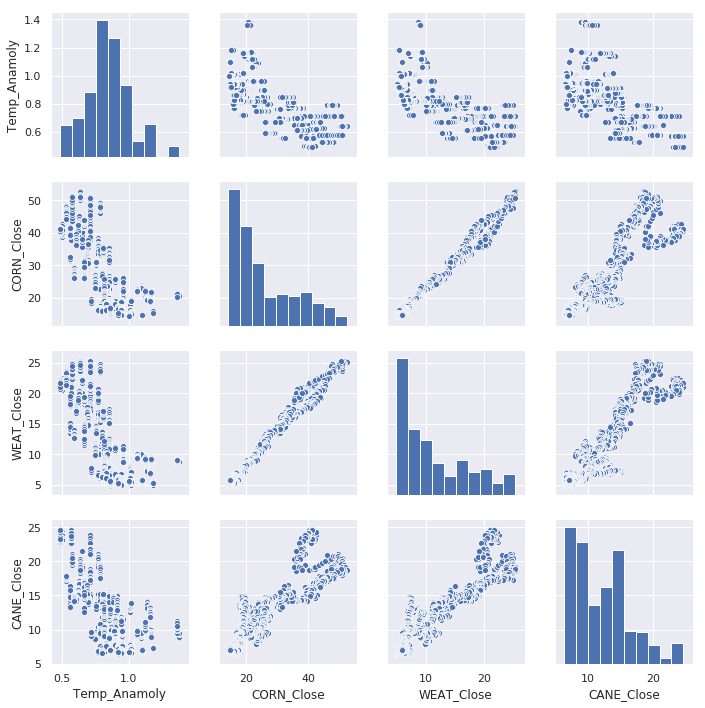

In [17]:
#scatterplot--- observing relationship between commodity stocks and Temp_Anamoly
#can see pattern for the relationship--- moderate and negative

sns.set()
cols = ['Temp_Anamoly', 'CORN_Close', 'WEAT_Close', 'CANE_Close']
sns.pairplot(data[cols], size = 2.5)
plt.show()

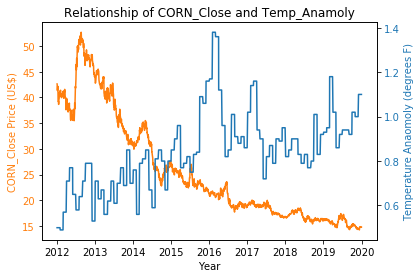

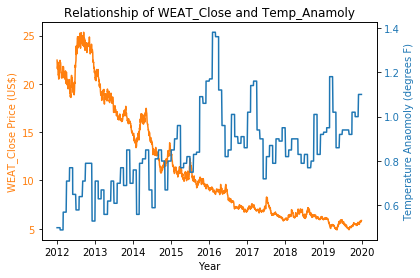

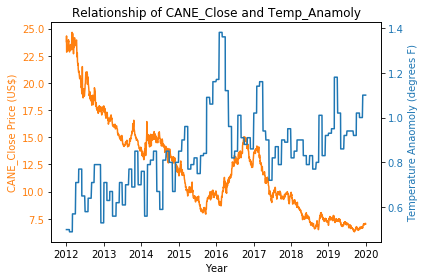

In [79]:
#same graphs as above just joined
#https://matplotlib.org/gallery/api/two_scales.html
#plotting temp anomoly and comodity stock closing prices---inverse relationship

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CORN_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_Close Price (US$)', color=color)
ax1.plot(data['CORN_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of WEAT_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_Close Price (US$)', color=color)
ax1.plot(data['WEAT_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CANE_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_Close Price (US$)', color=color)
ax1.plot(data['CANE_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Company Stock

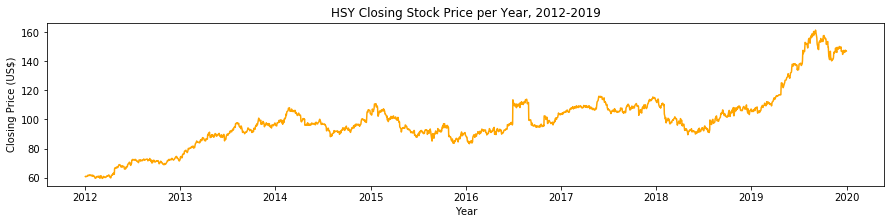

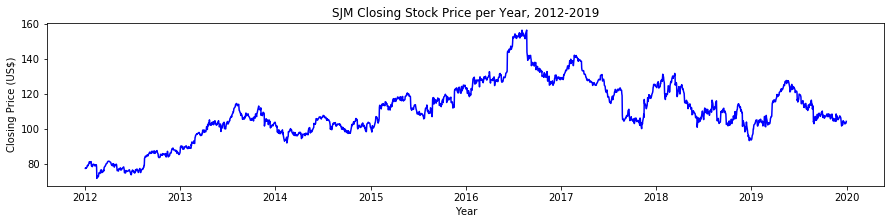

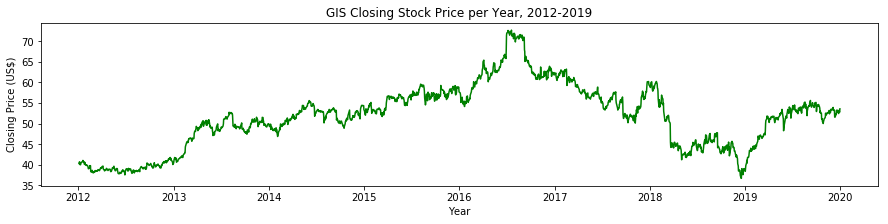

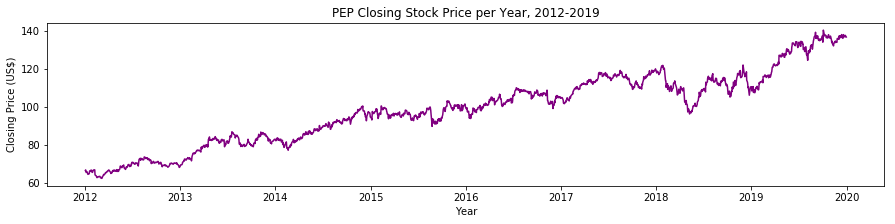

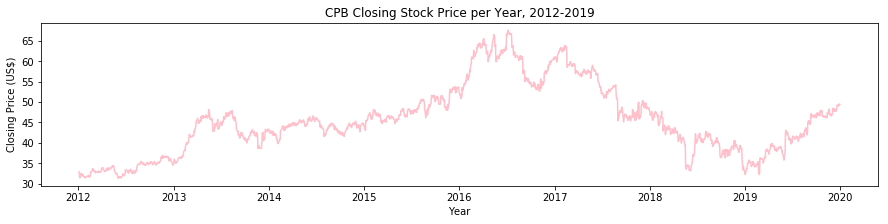

In [70]:
#Company stock closing prices per year
#we can see a similar peak pattern for almost all company stock slightly after the temp anamoly in 2016
#PEP does not show this peak--steady increase in closing prices

#HSY Closing prices per Year
plt.figure(figsize=(15,3))
plt.plot(data['HSY_Close'], color = 'orange')
plt.title('HSY Closing Stock Price per Year, 2012-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#SJM Closing Prices per Year
plt.figure(figsize=(15,3))
plt.plot(data['SJM_Close'], color = 'blue')
plt.title('SJM Closing Stock Price per Year, 2012-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#GIS closing prices per year
plt.figure(figsize=(15,3))
plt.plot(data['GIS_Close'], color = 'green')
plt.title('GIS Closing Stock Price per Year, 2012-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#PEP closing prices per year
plt.figure(figsize=(15,3))
plt.plot(data['PEP_Close'], color = 'purple')
plt.title('PEP Closing Stock Price per Year, 2012-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

#CPB closing prices per year
plt.figure(figsize=(15,3))
plt.plot(data['CPB_Close'], color = 'pink')
plt.title('CPB Closing Stock Price per Year, 2012-2019')
plt.ylabel('Closing Price (US$)')
plt.xlabel('Year')
plt.show()

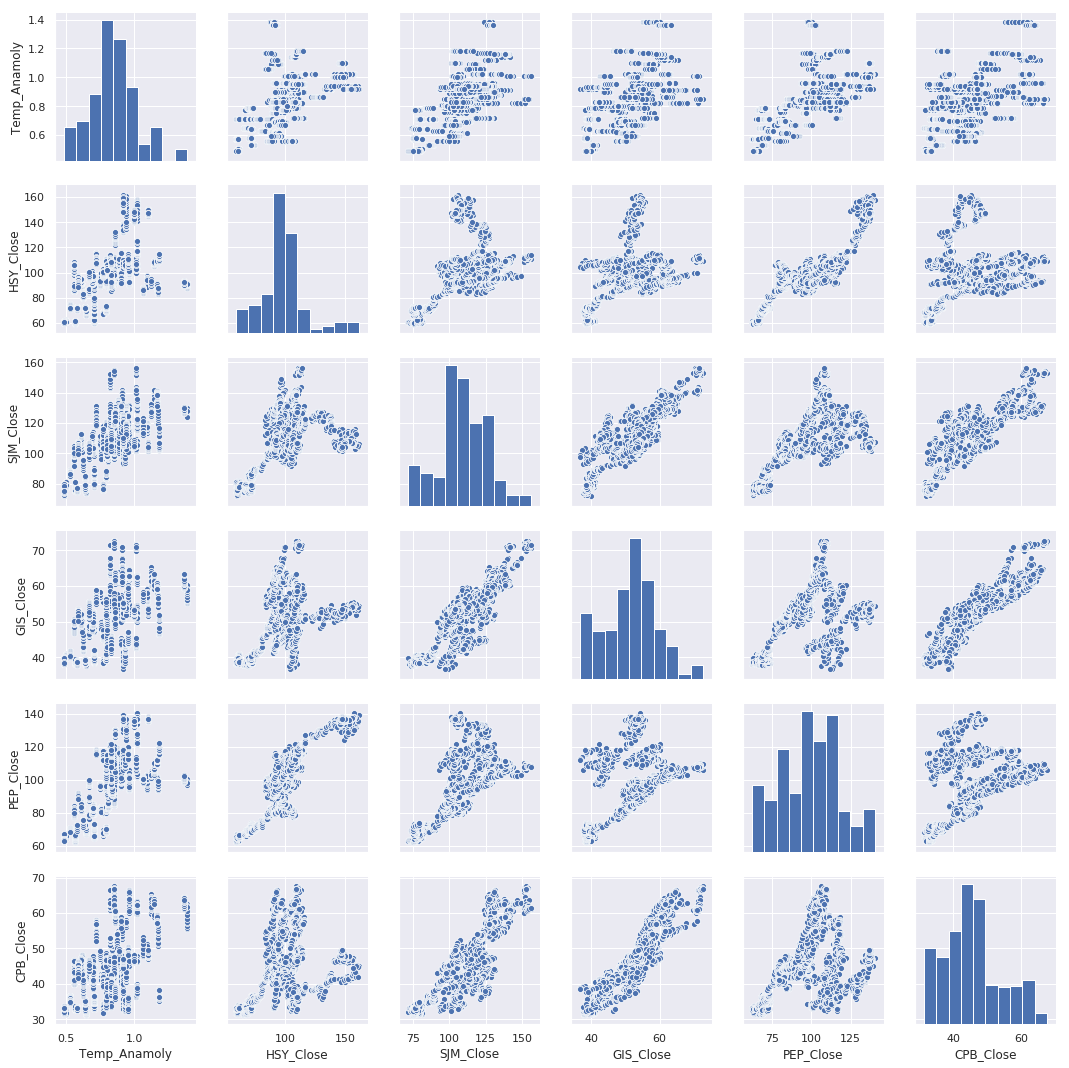

In [21]:
#scatterplot--- observing relationship between company stocks and Temp_Anamoly
#can see pattern for the relationship--- moderate and positive
#strongest wit PEP

sns.set()
cols = ['Temp_Anamoly', 'HSY_Close', 'SJM_Close', 'GIS_Close', 'PEP_Close', 'CPB_Close']
sns.pairplot(data[cols], size = 2.5)
plt.show()

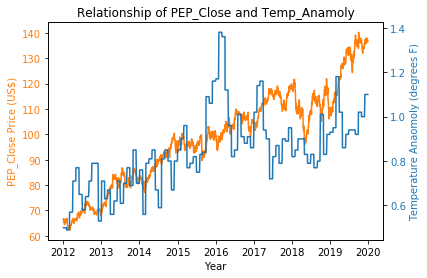

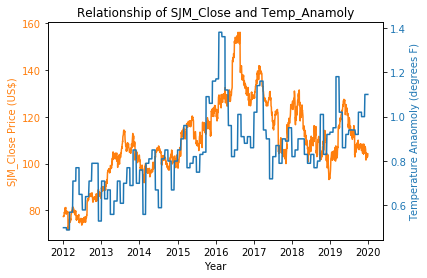

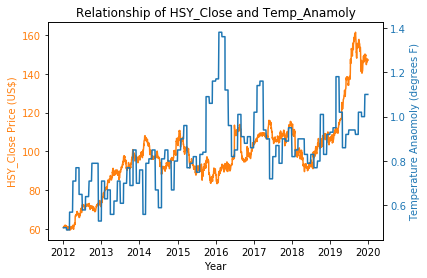

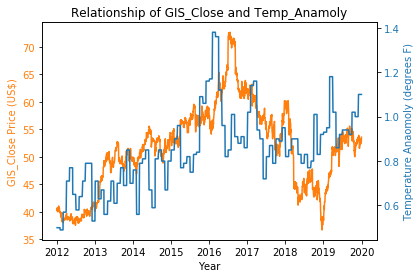

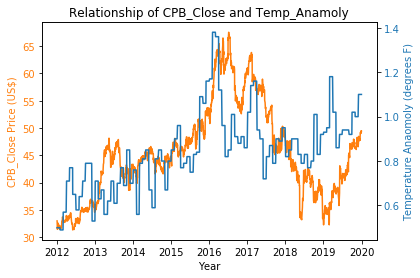

In [80]:
#graphing relationship between Temp_Anaomoly and company stock--same as above but combined
#positive relationship
#seems that SJM, GIS, CPB and Temp anamoly follow a very similar path---stocks follows behind

#Graph1---good correlation
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of PEP_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close Price (US$)', color=color)
ax1.plot(data['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2--good correlation
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of SJM_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_Close Price (US$)', color=color)
ax1.plot(data['SJM_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of HSY_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close Price (US$)', color=color)
ax1.plot(data['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of GIS_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_Close Price (US$)', color=color)
ax1.plot(data['GIS_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of CPB_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_Close Price (US$)', color=color)
ax1.plot(data['CPB_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


### Company Stock- Calculations

### Return
- [return = (p/p-1)-1](https://medium.com/business-analysis/stock-market-analysis-project-722520891dce)
    - (percent change formula)
- measure of a company's profitability calculated by looking at the change in price from the previous day
- profit/loss made by the stock 
- [positive return represents a profit while a negative return marks a loss](https://www.investopedia.com/terms/r/return.asp)

In [6]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

data.head(5)

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,CPB_Close,CPB_Volume,CORN_return,WEAT_return,CANE_return,HSY_return,SJM_return,GIS_return,PEP_return,CPB_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,32.98,"1,854,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,32.73,"1,721,200",-0.002581,-0.011576,0.021840,0.002139,-0.000259,0.005955,0.005120,-0.007580
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,31.81,"4,621,400",-0.023524,-0.021171,-0.061241,-0.001477,0.005176,0.004440,-0.007791,-0.028109
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,31.45,"4,981,500",-0.003854,-0.006903,0.000438,-0.002301,-0.003347,-0.015963,-0.012534,-0.011317
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,31.83,"1,759,800",0.020314,0.013438,0.006565,0.004449,0.006975,-0.001747,0.005200,0.012083


In [1]:
#looking at correlation between return values in stocks
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#no correlation of Temp_Anamoly and stock return--cannot look at relationship between profit/loss and temp_anamoly

stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')

NameError: name 'data' is not defined

### Cumulative Return
- http://srkprasadam.blogspot.com/2013/01/cumulative-return-vs-daily-return-for.html
- Cumulative return is the return computed relative to the day investment was made (in this case beginning with 1/3/2012)
- looking at the profit/ loss on a given day from the original amount invested--in our case it is not the original amount invested, but the beginning of our dataset. 
- If the cumulative return is above one-make a profit

In [8]:
#cumulative daily returns
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#Cumulative return is computed relative to the day investment
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

data.head(5)

,Month,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,0.5,36.12,2.09,42.73,42.99,42.18,42.62,"114,100",22.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,January,0.5,36.12,2.09,42.79,42.95,42.20,42.51,"43,900",22.64,...,0.005120,-0.007580,0.997419,0.988424,1.021840,1.002139,0.999741,1.005955,1.005120,0.992420
2012-01-05,January,0.5,36.12,2.09,42.25,42.25,41.35,41.51,"87,400",21.80,...,-0.007791,-0.028109,0.973956,0.967498,0.959261,1.000658,1.004916,1.010422,0.997289,0.964524
2012-01-06,January,0.5,36.12,2.09,41.72,41.80,41.26,41.35,"31,000",21.67,...,-0.012534,-0.011317,0.970202,0.960819,0.959681,0.998355,1.001552,0.994293,0.984789,0.953608
2012-01-09,January,0.5,36.12,2.09,42.05,42.52,41.87,42.19,"153,700",21.82,...,0.005200,0.012083,0.989911,0.973731,0.965981,1.002797,1.008538,0.992556,0.989910,0.965130


Text(0.5,1,'Correlation Heatmap')

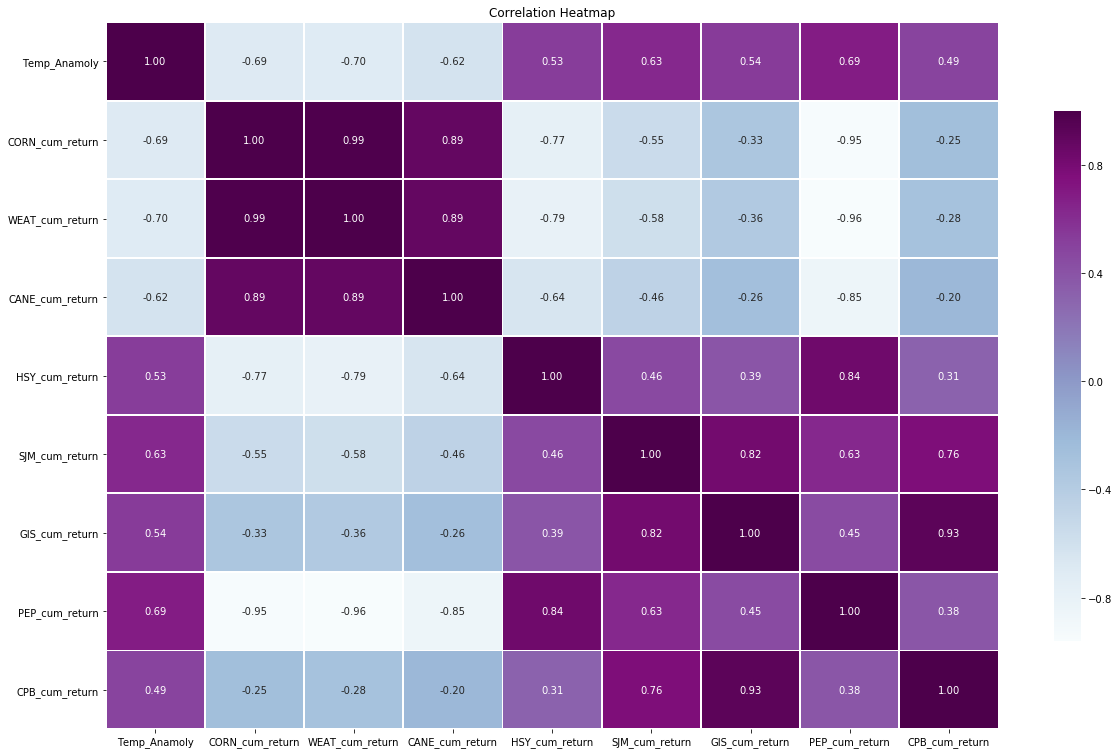

In [9]:
#Correlation with cumulative return
#moderate correlation of Temp_Anamoly with stock cumulative return
#negative for commodity stock
#positive for company stock

stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (20,13))

#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})

#Created a title
plt.title('Correlation Heatmap')